In [1]:
import pandas as pd

data = pd.read_csv("/workspaces/linear-regression-project-tutorial_if/data/medical_insurance_cost.csv")


In [2]:
data = data.dropna()
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


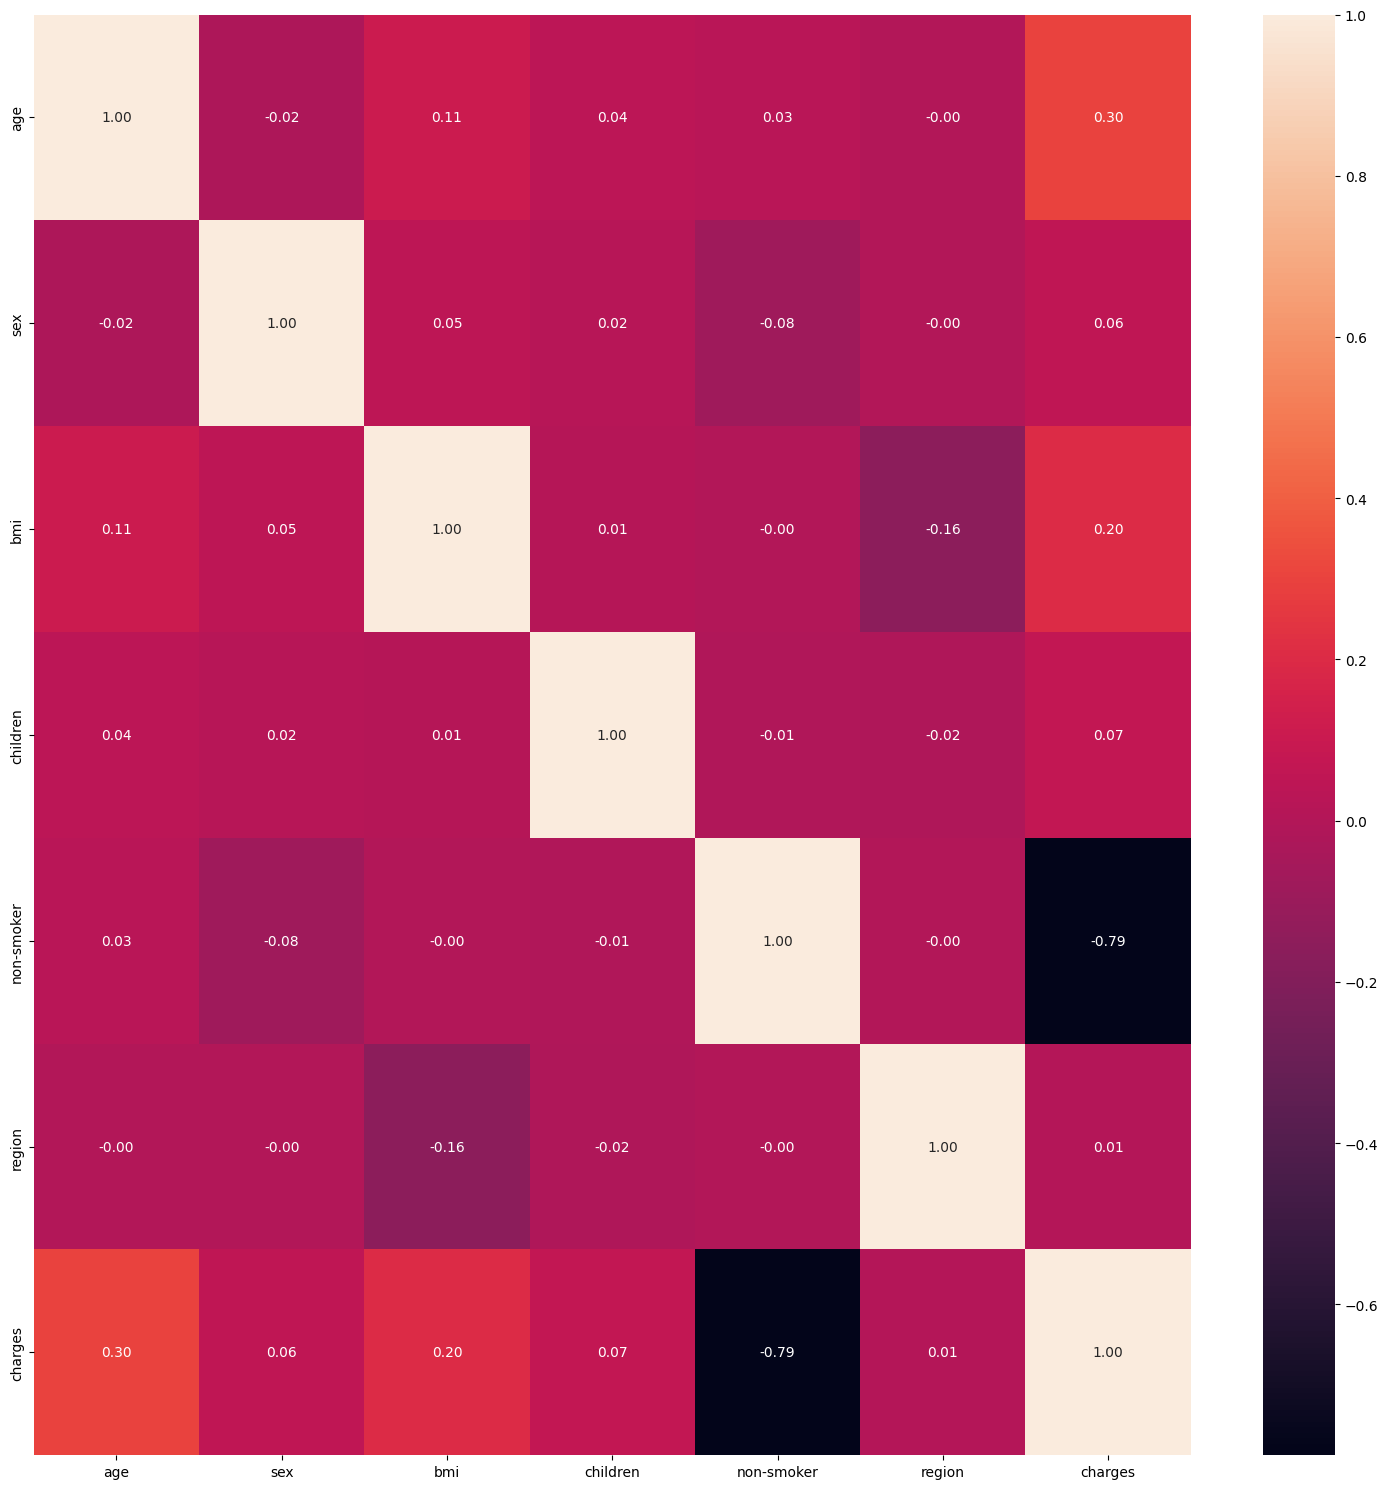

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Factorize the sex, smoker and region data
data["sex"] = pd.factorize(data["sex"])[0]
data["smoker"], smoker_labels = pd.factorize(data["smoker"], sort=True)
data["region"] = pd.factorize(data["region"])[0]

corr_matrix = data[["age", "sex", "bmi", "children", "smoker", "region", "charges"]].corr()
corr_matrix = corr_matrix.rename(index={'smoker': 'non-smoker'}, columns={'smoker': 'non-smoker'})

sfig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

The best dependancy is non-smoker - charges (-0.79) and second best is 0.3 Age - Charges.

In [12]:
#Split the set first
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop(columns=['charges'])
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1070, 6), y_train=(1070,)
Testing set shape: X_test=(268, 6), y_test=(268,)


In [13]:

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker
0,46.0,19.95,2.0,1.0
1,47.0,24.32,0.0,1.0
2,52.0,24.86,0.0,1.0
3,39.0,34.32,5.0,1.0
4,54.0,21.47,3.0,1.0


In [14]:
from sklearn.preprocessing import MinMaxScaler

data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]
data["region_n"] = pd.factorize(data["region"])[0]
num_variables = ["age", "bmi", "children", "charges"]


scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()
data_scal.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,0.193916
std,0.305434,0.164062,0.241099,0.193301
min,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.057757
50%,0.456522,0.388485,0.200000,0.131849
75%,0.717391,0.504002,0.400000,0.247700
max,1.000000,1.000000,1.000000,1.000000


,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [15]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("data/train/clean_train.csv", index = False)
X_test_sel.to_csv("data/test/clean_test.csv", index = False)
X_test_sel.head()

,age,bmi,children,smoker,charges
0,45.0,25.175,2.0,1.0,9095.06825
1,36.0,30.020,0.0,1.0,5272.17580
2,64.0,26.885,0.0,0.0,29330.98315
3,46.0,25.745,3.0,1.0,9301.89355
4,19.0,31.920,0.0,0.0,33750.29180


In [16]:
train_data = pd.read_csv("data/train/clean_train.csv")
test_data = pd.read_csv("data/test/clean_test.csv")

train_data.head()

,age,bmi,children,smoker,charges
0,46.0,19.95,2.0,1.0,9193.83850
1,47.0,24.32,0.0,1.0,8534.67180
2,52.0,24.86,0.0,1.0,27117.99378
3,39.0,34.32,5.0,1.0,8596.82780
4,54.0,21.47,3.0,1.0,12475.35130


KeyError: 'smoker_n'

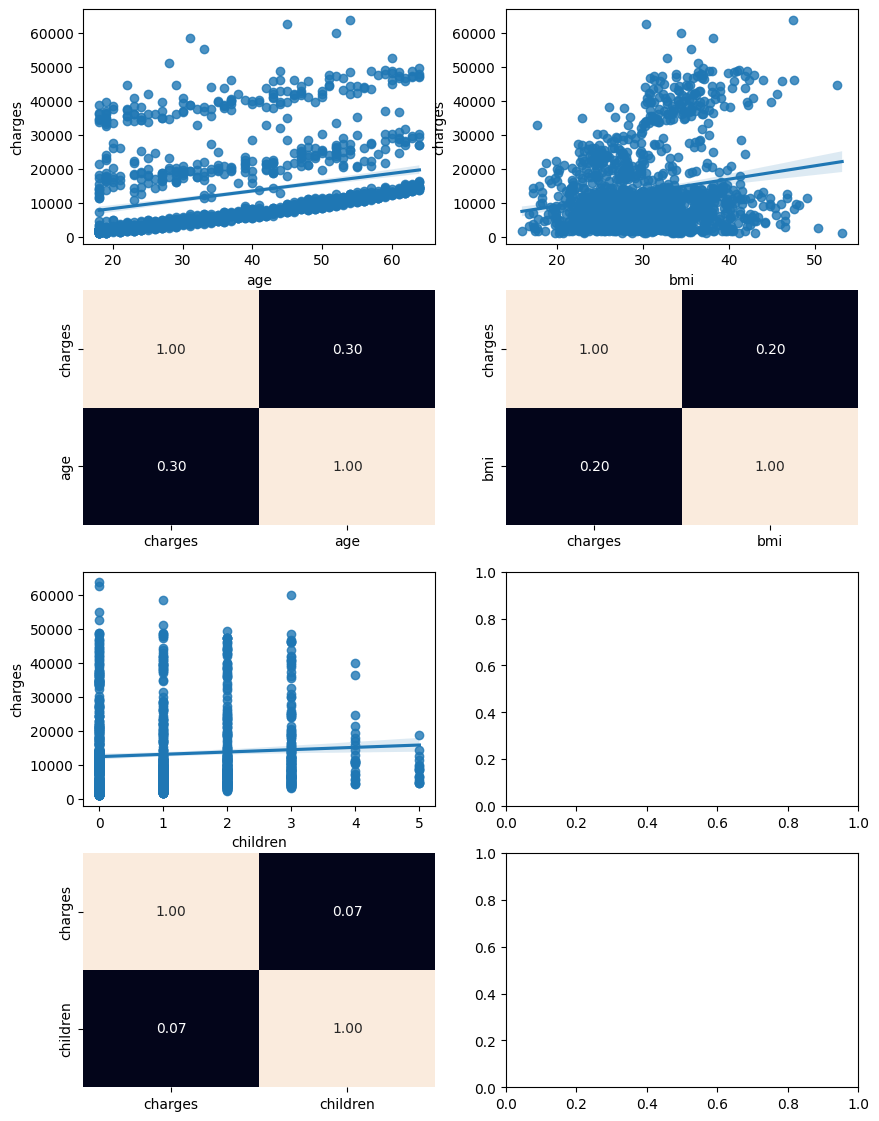

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
data = pd.concat([train_data, test_data])

sns.regplot(data = data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [18]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 11536.136572186193
Coefficients (b1, b2): [   257.07115795    327.52263109    427.19997095 -23653.21164629]


In [21]:
y_pred = model.predict(X_test)
y_pred

array([ 8550.90921341,  6969.71599759, 36794.13661808,  9421.86824203,
       26875.01095777, 11101.26514111,   141.44896605, 16750.22436643,
         743.78364016, 11157.63586446, 28521.42342227,  9296.15962897,
        5456.5831315 , 38513.59317763, 40362.63211366, 37226.61219261,
       15312.47750251, 36042.83494384,  9322.40796481, 31395.64230108,
        4273.49461256, 10468.62243337,  2723.96491222,  6575.5287315 ,
       11228.01912269, 12468.20703945, 14803.23875441,  6062.13408867,
        9531.77127863,  2381.73787018,  9470.9842188 , 12959.38866372,
        4702.13338911,  3410.73606761,  4819.65393639, 12488.16536441,
        2355.2166747 ,  9157.11135848, 33234.15784494, 32746.69484389,
        4270.42403098,  4233.52485656, 14431.41993531, 11388.84943272,
        8929.60714179, 12484.19557109,  5150.40526844,  3550.1037231 ,
       35652.7853174 ,  9280.12457197, 15967.47938558,  2556.74541518,
       12158.95859481,  1066.73450634, 13555.51395976, 12107.63444981,
      

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 33981653.95019775
R2 Score: 0.7811147722517887
